#Homework 7
Load the Micro123 and micro456 datasets from this lecture. Each has 3 channels at each time point.

Stack the datasets so that there are 6 channels (3 from micro123 and 3 from micro456) at each time point.

Calculate the ICA of the 6 channels and plot the 6 ICA results for 200 time points.
Calculate the PCA with 4 outputs, then calculate the ICA of the resulting 4 output timeseries and plot the 4 ICA results for 200 time points.

In [2]:
#The usual preamble
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import tensorflow as tf
from scipy import signal
from sklearn.decomposition import FastICA, PCA
#for your homework
np.random.seed(57999719)
tf.random.set_seed(57999719)

# Load the micro Datasets

In [4]:
from google.colab import drive
drive.mount('/content/drive')
df1 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/micro123.csv', names = ['ch1', 'ch2', 'ch3'])
df2 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/micro456.csv',  names = ['ch4', 'ch5', 'ch6'])
dfcomb = pd.concat([df1, df2], axis = 1) #stack going across
dfcomb

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,ch1,ch2,ch3,ch4,ch5,ch6
0,-15.936,-29.312,0.448000,-16.320,-25.792000,-16.000000
1,-11.840,-24.704,9.215999,-12.288,-33.600000,-10.048000
2,-16.512,-26.176,14.912000,-10.816,-24.448000,-11.136000
3,-12.800,-23.808,9.855999,-4.480,-27.200000,-16.896000
4,-8.384,-19.392,0.384000,-21.760,-32.320000,-21.248000
...,...,...,...,...,...,...
99995,-26.688,-21.824,-14.272000,-17.152,-3.520000,-16.064000
99996,-14.272,-20.992,-21.376000,-13.824,-8.575999,-17.536000
99997,-8.384,-15.872,-21.888000,-3.968,6.016000,-6.335999
99998,-17.408,-29.888,-29.120000,-36.928,-12.800000,-14.400000


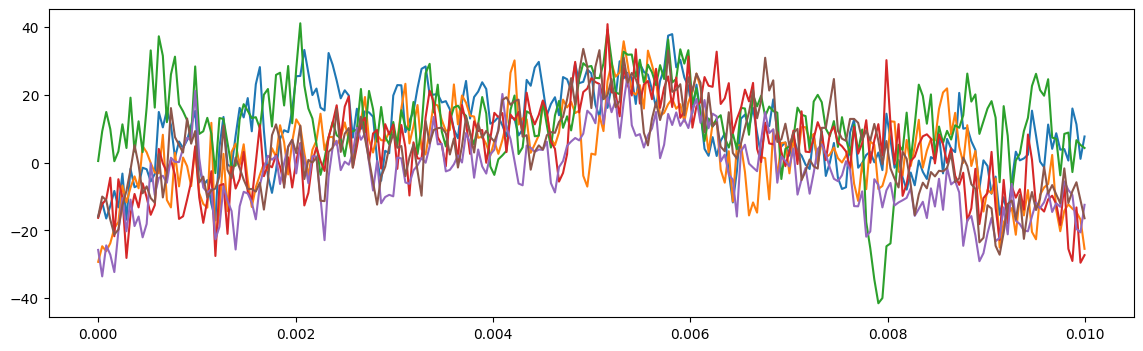

In [5]:
samplingFrequency = 24414
nPoints = len(dfcomb)
maxTime = nPoints/samplingFrequency
ts_index = np.linspace(start= 0 ,stop=maxTime, num= nPoints)
dfMic = pd.DataFrame(dfcomb.values, index = ts_index)
plt.figure(figsize=(14,4))
plt.plot(dfMic[0:.01]);

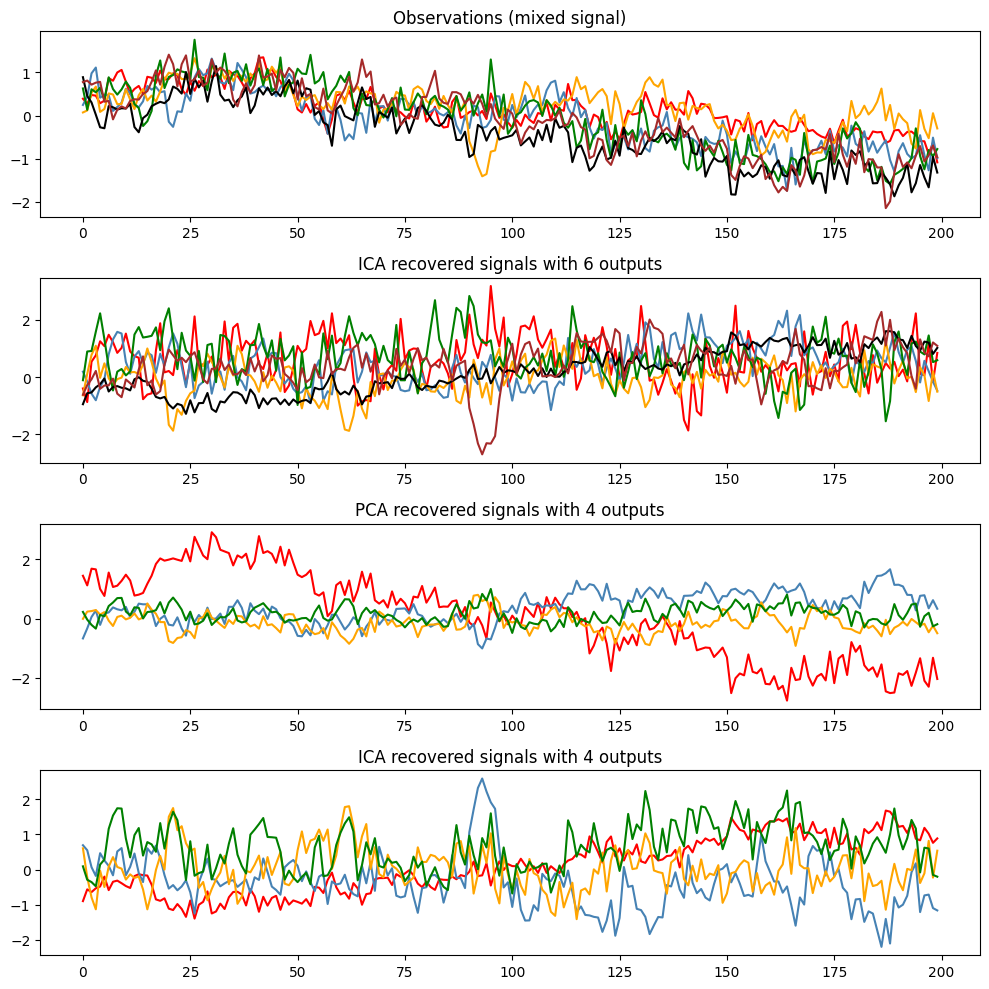

In [8]:
#do the ICA on the Combined micro data
X = dfcomb.values
X /= X.std(axis=0)  # Standardize data

# 1. Compute ICA with 6 outputs
ica = FastICA(n_components=6)
S_ = ica.fit_transform(X)  # Reconstruct signals
A_ = ica.mixing_  # Get estimated mixing matrix

# We can `prove` that the ICA model applies by reverting the unmixing.
assert np.allclose(X, np.dot(S_, A_.T) + ica.mean_)

# 2. compute PCA with 4 outputs
pca = PCA(n_components=4)
H = pca.fit_transform(X)  # Reconstruct signals based on orthogonal components

# 3. Compute the ICA of the resulting 4 output timeseries
ica2 = FastICA(n_components=4)
S2_ = ica2.fit_transform(H)  # Reconstruct signals
A2_ = ica2.mixing_  # Get estimated mixing matrix


# Plot results
plt.figure(figsize=(10,10))
models = [X, S_, H, S2_]
names = [
    "Observations (mixed signal)",
    "ICA recovered signals with 6 outputs",
    "PCA recovered signals with 4 outputs",
    "ICA recovered signals with 4 outputs",
]
colors = ["red", "steelblue", "orange", "green","black", "brown"]

for ii, (model, name) in enumerate(zip(models, names), 1):
    plt.subplot(4,1, ii)
    plt.title(name)
    for sig, color in zip(model[100:300,:].T, colors):
        plt.plot(sig, color=color)

plt.tight_layout()
plt.show()